In [ ]:
import pandas as pd
customers = pd.read_csv('/content/Customers.csv')
print(customers.head())
print(customers.info())
print(customers.isnull().sum())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


0
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
SignupDate
2024    79
2022    64
2023    57
Name: count, dtype: int64


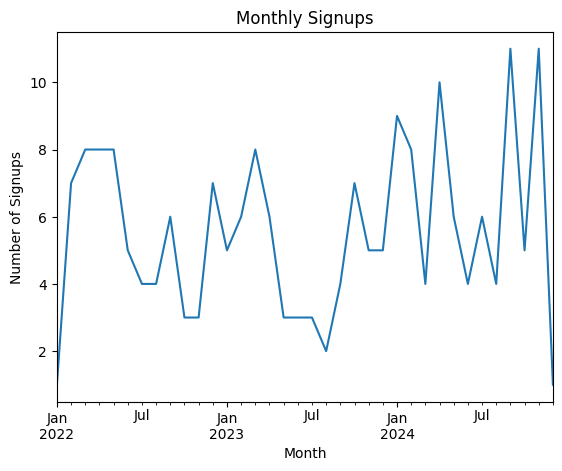

In [ ]:
# Check for duplicates in CustomerID
print(customers['CustomerID'].duplicated().sum())

# Analyze unique regions and their distribution
print(customers['Region'].value_counts())

# Convert SignupDate to datetime and analyze trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
print(customers['SignupDate'].dt.year.value_counts())

# Plot signups over time (if libraries like matplotlib or seaborn are available)
import matplotlib.pyplot as plt
customers['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
plt.title('Monthly Signups')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()


In [ ]:
# Handle missing values (if any)
customers.fillna(method='ffill', inplace=True)

# Encode the Region column
customers['Region_Encoded'] = customers['Region'].astype('category').cat.codes

# Engineer a feature for days since signup
customers['DaysSinceSignup'] = (pd.Timestamp.now() - customers['SignupDate']).dt.days

# Display the updated dataset
print(customers.head())


  CustomerID        CustomerName         Region SignupDate  Region_Encoded  \
0      C0001    Lawrence Carroll  South America 2022-07-10               3   
1      C0002      Elizabeth Lutz           Asia 2022-02-13               0   
2      C0003      Michael Rivera  South America 2024-03-07               3   
3      C0004  Kathleen Rodriguez  South America 2022-10-09               3   
4      C0005         Laura Weber           Asia 2022-08-15               0   

   DaysSinceSignup  
0              932  
1             1079  
2              326  
3              841  
4              896  


<ipython-input-3-0e821c25efca>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  customers.fillna(method='ffill', inplace=True)


Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<ipython-input-4-0c51f99d5221>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


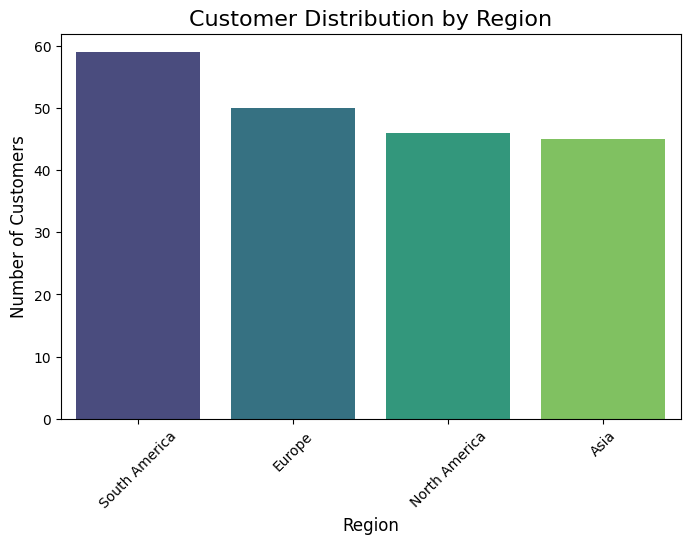

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of customers by region
region_counts = customers['Region'].value_counts()
print(region_counts)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Customer Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()


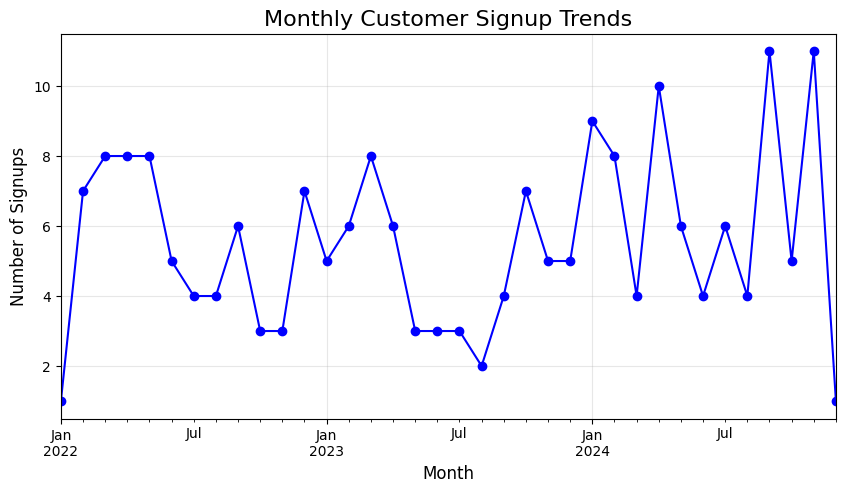

In [ ]:
# Monthly signup trends
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()

# Plot the trends
plt.figure(figsize=(10, 5))
signup_trends.plot(kind='line', marker='o', color='b')
plt.title('Monthly Customer Signup Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


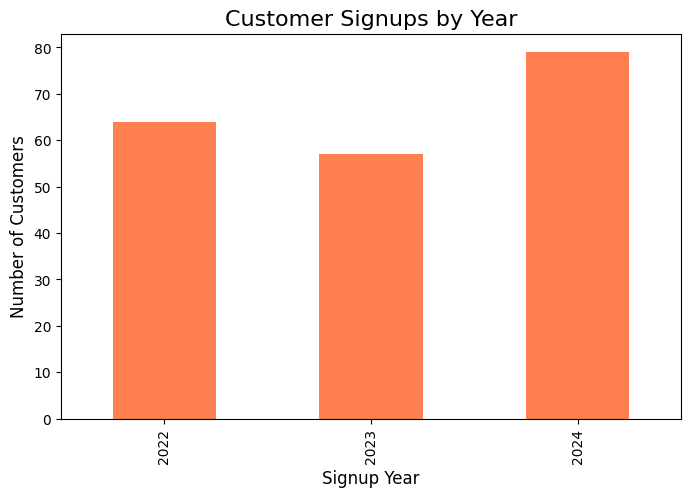

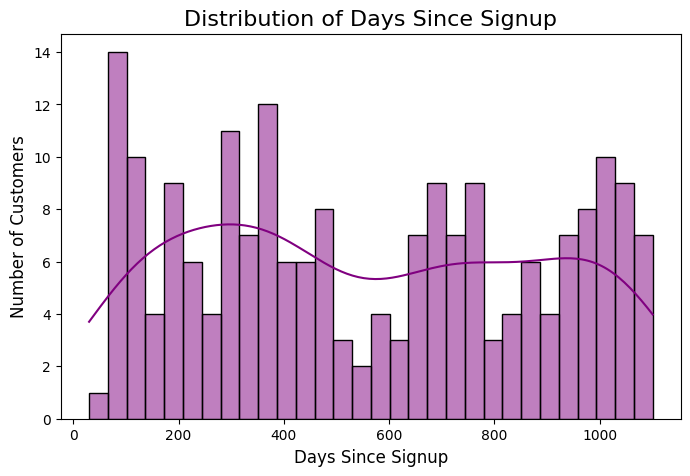

In [ ]:
# Segment customers based on how recently they signed up
customers['Signup_Year'] = customers['SignupDate'].dt.year
signup_year_counts = customers['Signup_Year'].value_counts().sort_index()

# Plot customer signups by year
plt.figure(figsize=(8, 5))
signup_year_counts.plot(kind='bar', color='coral')
plt.title('Customer Signups by Year', fontsize=16)
plt.xlabel('Signup Year', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

# Days since signup distribution
plt.figure(figsize=(8, 5))
sns.histplot(customers['DaysSinceSignup'], bins=30, kde=True, color='purple')
plt.title('Distribution of Days Since Signup', fontsize=16)
plt.xlabel('Days Since Signup', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()


In [ ]:
Products

In [ ]:

products = pd.read_csv('/content/Products.csv')  # Update the file path if needed

# Display the first few rows
print(products.head())

# Inspect the structure and data types
print(products.info())

# Check for missing values
print(products.isnull().sum())

# Check for duplicate ProductIDs
print("Duplicate ProductIDs:", products['ProductID'].duplicated().sum())


  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Duplicate ProductIDs: 0


In [ ]:
# Get summary statistics for numerical columns
print(products.describe())

# Summary of categorical columns (ProductName and Category)
print(products['ProductName'].nunique(), "unique product names.")
print(products['Category'].value_counts())


            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
66 unique product names.
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


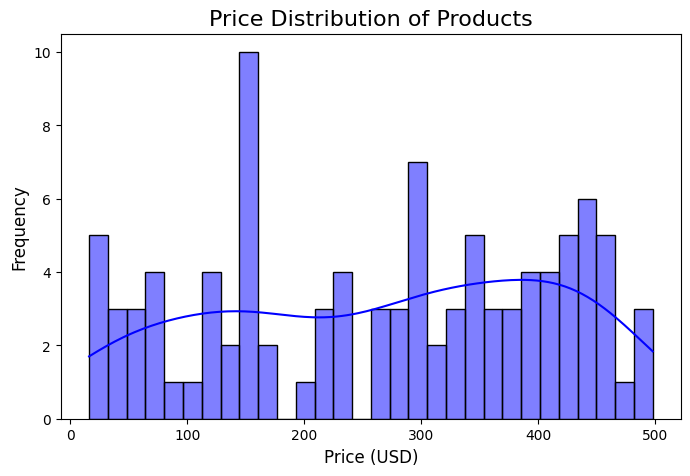

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the price distribution
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution of Products', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


<ipython-input-14-4f7e4c53c4af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


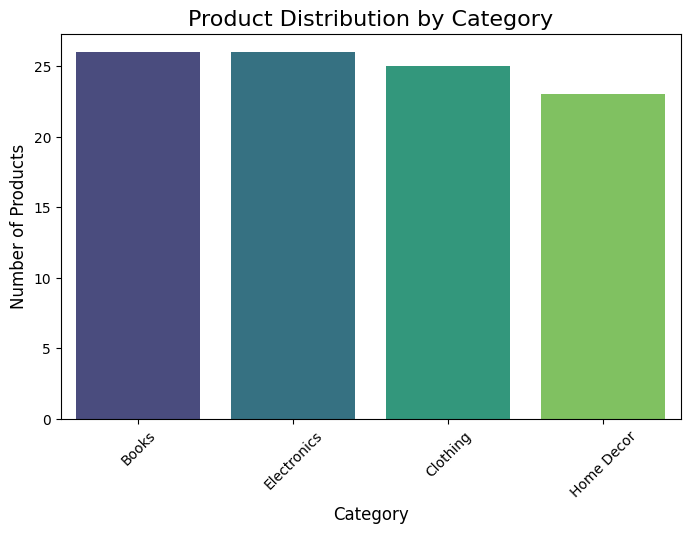

In [ ]:
# Count products per category
category_counts = products['Category'].value_counts()

# Plot category distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Product Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Category
Books          292.212308
Electronics    275.353462
Clothing       263.720000
Home Decor     235.020000
Name: Price, dtype: float64


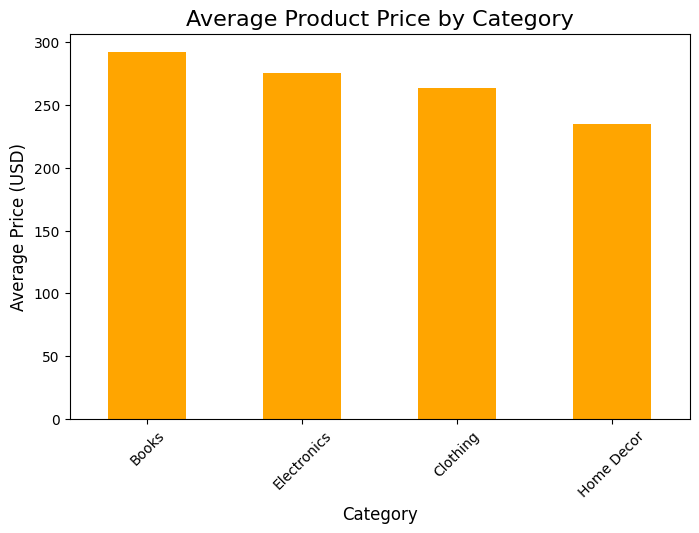

In [ ]:
# Group by category and calculate average price
avg_price_per_category = products.groupby('Category')['Price'].mean().sort_values(ascending=False)
print(avg_price_per_category)

# Plot average price per category
plt.figure(figsize=(8, 5))
avg_price_per_category.plot(kind='bar', color='orange')
plt.title('Average Product Price by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
Transactions

In [5]:
# Load the Transactions.csv dataset
import pandas as pd

transactions = pd.read_csv('/content/Transactions.csv')  # Update file path if needed

# Display the first few rows
print(transactions.head())

# Inspect the structure and data types
print(transactions.info())

# Check for missing values
print(transactions.isnull().sum())

# Check for duplicate TransactionIDs
print("Duplicate TransactionIDs:", transactions['TransactionID'].duplicated().sum())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5

In [6]:
# Summary statistics for numerical columns
print(transactions[['Quantity', 'TotalValue', 'Price']].describe())


          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [7]:
# Count unique customers and products involved in transactions
print("Unique Customers:", transactions['CustomerID'].nunique())
print("Unique Products:", transactions['ProductID'].nunique())


Unique Customers: 199
Unique Products: 100


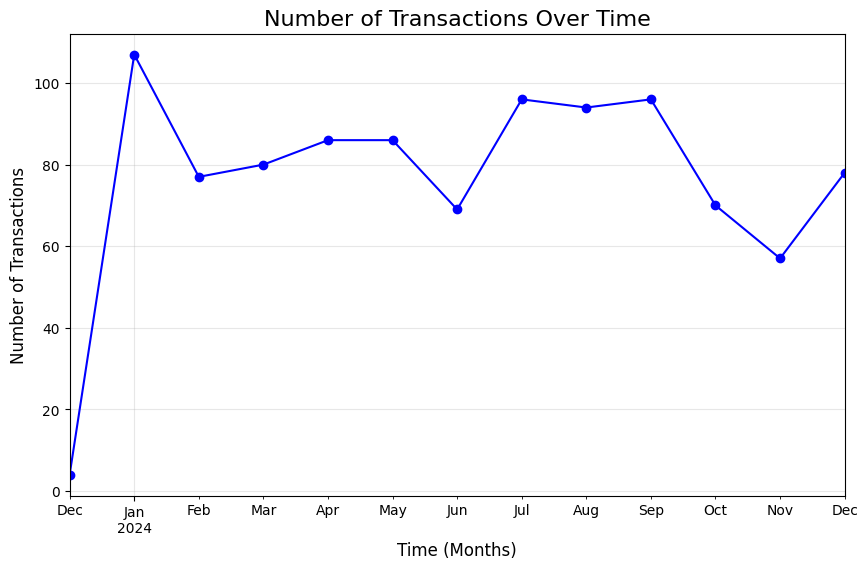

In [8]:
# Convert TransactionDate to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Transactions over time
transactions_over_time = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).size()

# Plot transactions over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
transactions_over_time.plot(kind='line', marker='o', color='blue')
plt.title('Number of Transactions Over Time', fontsize=16)
plt.xlabel('Time (Months)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [9]:
# Top products by quantity sold
top_products_by_quantity = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity Sold:\n", top_products_by_quantity)

# Top products by revenue
top_products_by_revenue = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Revenue:\n", top_products_by_revenue)


Top 10 Products by Quantity Sold:
 ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64
Top 10 Products by Revenue:
 ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


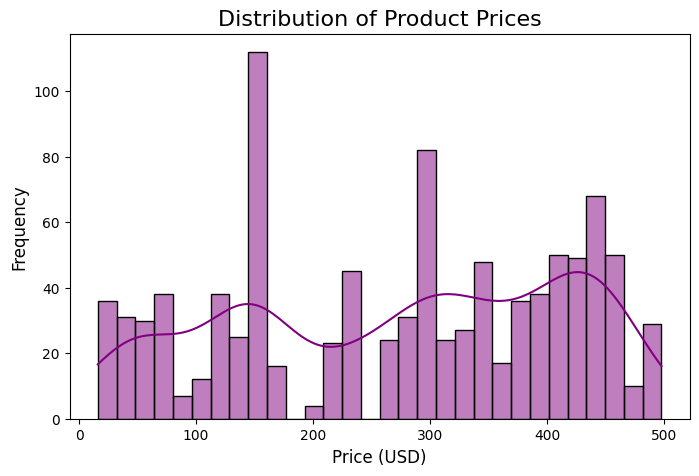

In [10]:
import seaborn as sns
# Plot price distribution
plt.figure(figsize=(8, 5))
sns.histplot(transactions['Price'], bins=30, kde=True, color='purple')
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [11]:
# Top customers by number of transactions
top_customers = transactions['CustomerID'].value_counts().head(10)
print("Top 10 Customers by Number of Transactions:\n", top_customers)


Top 10 Customers by Number of Transactions:
 CustomerID
C0109    11
C0156    11
C0141    10
C0175    10
C0065    10
C0008    10
C0147     9
C0093     9
C0075     9
C0084     9
Name: count, dtype: int64


In [12]:
# Top customers by revenue
top_customers_by_revenue = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Revenue:\n", top_customers_by_revenue)


Top 10 Customers by Revenue:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64
